# Projeto de Machine Learning - Regressão Linear 

- Você começou a trabalha em uma **empresa de comércio eletrônico**, como um cientista de dados, na cidade de Nova York. A empresa **vende roupas onlines** e também **fornece serviços** de consultoria em estilo e vestuário.

- Clientes procuram na loja sessões/reuniões com um estilista pessoal e podem decidir encomendar roupas que eles desejam usando um aplicativo móvel ou um site;

- A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em **aplicativos móveis ou em seu site**. Não existe recurso para os investimentos, você foi contratado para ajudá-los a descobrir isso! Vamos começar!

In [1]:
### Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Etapas do projeto
- Coleta de dados
- Análise de dados
- Criação de modelos
- Validação de modelos
- Apresentação dos resultados


### 1. Coleta de dados

Empresa de forneceu um arquivo com seus dados:

Arquivo: https://www.kaggle.com/srolka/ecommerce-customers
- Informações pessoais do cliente:
    - **Nome**
    - **Email**
    - **Avatar**
- Informações sobre a interação do cliente com a loja 
    - **Avg. Session Length**: Tempo médio das sessões de consultoria de estilo na loja.
    - **Time on App**: Tempo médio gasto no app em minutos.
    - **Time on Website**: Tempo médio gasto no site em minutos.
    - **Lenght of Membership**: Há quantos anos o cliente é membro.
    - **Yearly Amount Spent**: Valor gasto anualmente

In [3]:
## Leitura dos dados
clientes = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia de dados\material-apoio-regressao-linear\Ecommerce Customers.csv")

In [4]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## 2. Análise de dados exploratória

In [9]:
!pip install -U pandas-profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=f9a1f52da193fda027a037b3c24303169499e79ba1d150806afd5e399d282913
  Stored in directory: c:\users\marcf\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [10]:
from pandas_profiling import ProfileReport

<ipython-input-10-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [11]:
from ydata_profiling import ProfileReport

In [12]:
relatorio = ProfileReport(clientes, title='Relatorio Clientes do Ecommerce')
relatorio.to_file('relatorio_ecommerce.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
relatorio

### Insights 
- Pessoas que passam necessariamente mais tempo no site não gastam mais!  
- Pessoas que **gastam mais tempo no app** tem uma tendência para **gastar mais**!
- Pessoas que são clientes a algum tempo NÃO gastam mais.
- Pessoas que tem **maior tempo de membro** tem uma tendência a gastar mais.

- Qual a relação da pessoa que passa mais tempo no site em relação ao valor gasto anual?

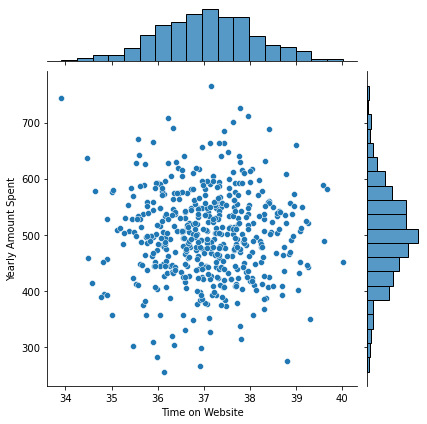

In [15]:
sns.jointplot(x='Time on Website', y="Yearly Amount Spent", data=clientes);

- Qual a relação da pessoa que passa mais tempo no APP em relação ao valor gasto anual?  

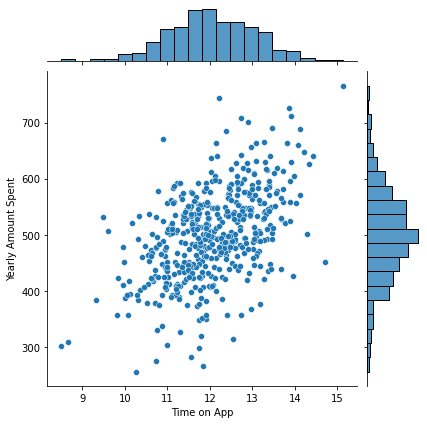

In [16]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes)

* As pessoas que usam o aplicativo são clientes a mais tempo?

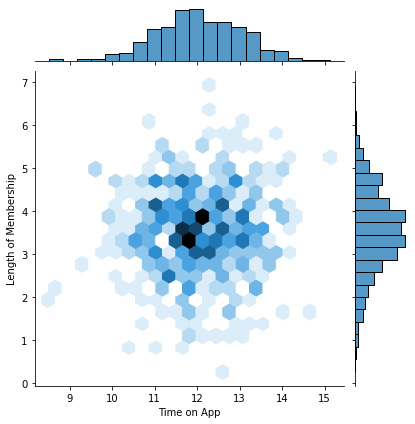

In [17]:
sns.jointplot(x='Time on App', y='Length of Membership', data=clientes, kind='hex')

* Quais variáveis conseguimos explicar ou que tem o maior impacto no quanto uma pessoa gasta no ano?

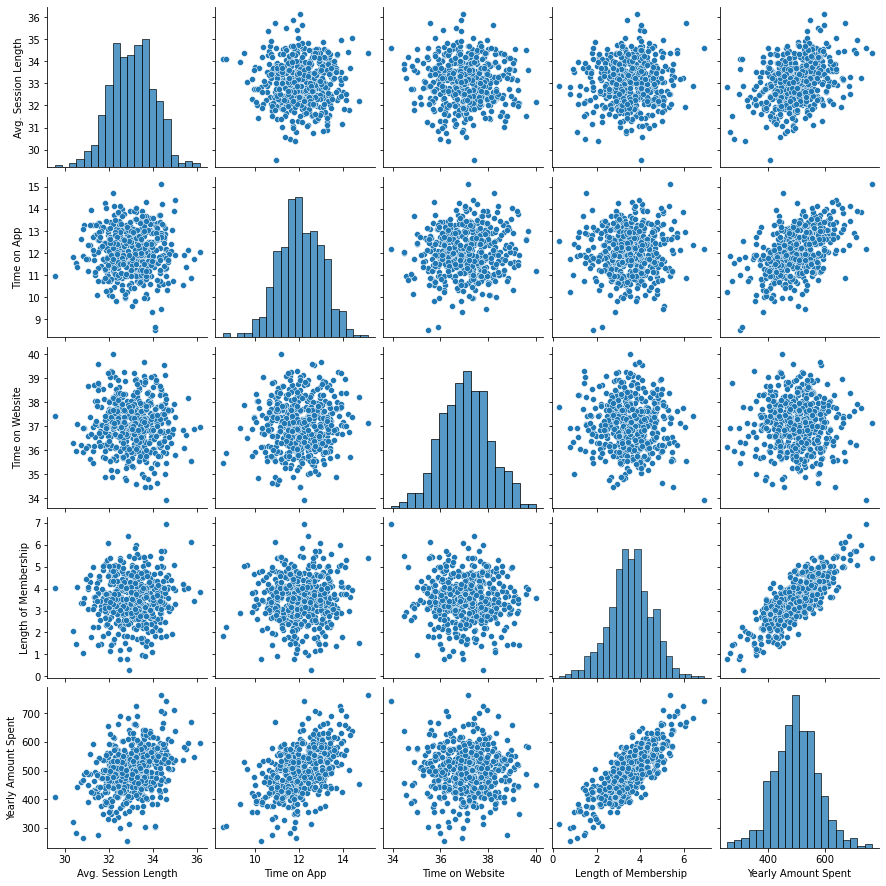

In [18]:
sns.pairplot(clientes)

* Como ficaria um modelo linear usando o Tempo de App em relação ao valor gasto?

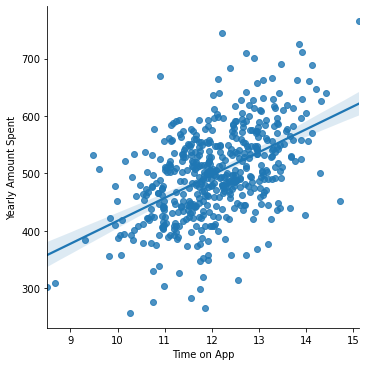

In [19]:
sns.lmplot(x='Time on App', y='Yearly Amount Spent', data=clientes)

* Como ficaria um modelo linear usando o Tempo de Membro em relação ao valor gasto?

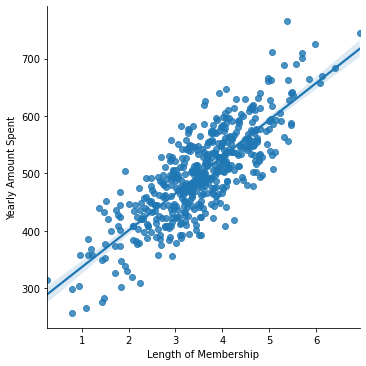

In [20]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=clientes)

## 3. Criação de um Modelo com todas as variáveis

- Separa quem é meu X e meu y

In [22]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [21]:
y = clientes['Yearly Amount Spent']

In [30]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [26]:
X = clientes[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [31]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


* Dividir meu conjunto em treino e teste usando scikit learning

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [32]:
X_train.shape

(350, 4)

In [33]:
X_test.shape

(150, 4)

In [34]:
y_train.shape

(350,)

In [35]:
y_test.shape

(150,)

* Criar um modelo de regressão linear usando o sklearn

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()

* Utilizando método fit() para treinamento do meu modelo

In [36]:
lm.fit(X_train, y_train)

LinearRegression()

* Apresentando os coeficientes para cada variável do meu X

In [37]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

* Para validar o modelo no condjunto de teste você precisa utilizar o método predict()

In [38]:
p = lm.predict(X_test)

In [39]:
p

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

**Criando um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos.**

Text(0, 0.5, 'p predito')

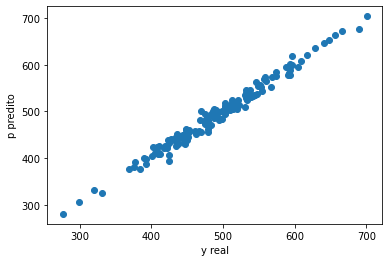

In [40]:
plt.scatter(y_test, p)
plt.xlabel('y real')
plt.ylabel('p predito')

## 4. Avaliando o Modelo
layouts: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html


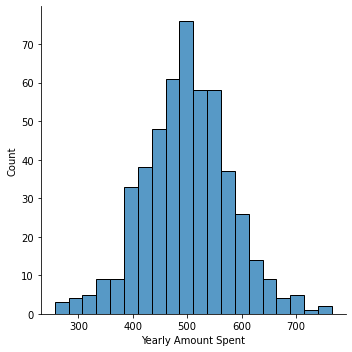

In [42]:
sns.displot(clientes, x='Yearly Amount Spent')
plt.tight_layout()

In [43]:
from sklearn import metrics

In [45]:
print('MAE: ', metrics.mean_absolute_error(y_test, p))
print('MSE: ', metrics.mean_squared_error(y_test, p))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, p)))
print('R: ', metrics.r2_score(y_test, p))

MAE:  8.426091641432128
MSE:  103.91554136503363
RMSE:  10.193897260863169
R:  0.9808757641125855


In [53]:
def adjusted_R(y,p,N):
    adj_r = (1 - ((1 - metrics.r2_score(y,p))*(len(y)-1)) / (len(y)-N-1))
    return adj_r
print('R-Adjust: ', adjusted_R(y_test, p, X_train.shape[1]))

R-Adjust:  0.9803481989846567


## Conclusões

- O modelo linear resolveu o problema?

In [51]:
absolute_error = y_test-p

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

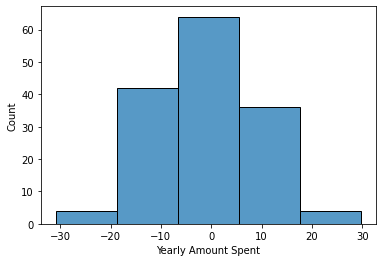

In [52]:
sns.histplot(absolute_error, bins=5)

- Q1) Qual a variável mais importante do meu modelo? 
- Q2) É melhor eu investir no site ou no aplicativo?

In [54]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

,Coefs
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


- A cada aumento em uma unidade no tempo médio das sessões de consultoria com o estilista, temos um aumento de 25.72 dólares gasto no ano;
- A cada minuto gasto em média no aplicativo, aumentamos a receita anual em 38.59 dólares;
- O tempo no site reflete muito pouco na receita anual
- A empresa ganha mais quando fideliza seu cliente, quanto mais tempo em unidade de fidelização maior a receita anual em 61.67 dólares